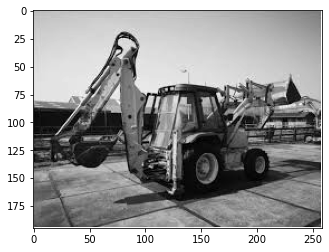

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/Users/adampetricek/Projects/Work/OnBoarding/data/"

#["backhoe", "excavator", "wheel loader", "scissor lift"]
CATEGORIES = ["backhoe", "scissor lift"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap="gray") 
        plt.show()
        break 
    break

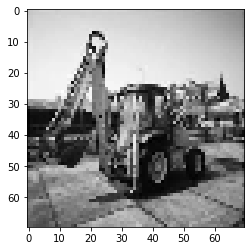

In [4]:
IMG_SIZE = 70

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=backhoe 1=excavator

        for img in tqdm(os.listdir(path)):  # iterate over each image per backhoe and excavator
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass

create_training_data()

print(len(training_data))

100%|██████████| 555/555 [00:01<00:00, 458.27it/s]

1236


In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
1
0
1
0
0


In [8]:
len(training_data)

1236

In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [11]:
X = X/255.0

In [12]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

2022-05-30 10:53:33.080795: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [14]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
35/35 [==============================] - 15s 416ms/step - loss: 0.7476 - accuracy: 0.6385 - val_loss: 0.5173 - val_accuracy: 0.7742
Epoch 2/10
35/35 [==============================] - 14s 408ms/step - loss: 0.4131 - accuracy: 0.8076 - val_loss: 0.3948 - val_accuracy: 0.8065
Epoch 3/10
35/35 [==============================] - 15s 422ms/step - loss: 0.3394 - accuracy: 0.8669 - val_loss: 0.2835 - val_accuracy: 0.8790
Epoch 4/10
35/35 [==============================] - 16s 446ms/step - loss: 0.2343 - accuracy: 0.8966 - val_loss: 0.3908 - val_accuracy: 0.8468
Epoch 5/10
35/35 [==============================] - 15s 441ms/step - loss: 0.1808 - accuracy: 0.9308 - val_loss: 0.2550 - val_accuracy: 0.8952
Epoch 6/10
35/35 [==============================] - 15s 442ms/step - loss: 0.1322 - accuracy: 0.9568 - val_loss: 0.2814 - val_accuracy: 0.9032
Epoch 7/10
35/35 [==============================] - 16s 459ms/step - loss: 0.0972 - accuracy: 0.9694 - val_loss: 0.1258 - val_accuracy: 0.9758

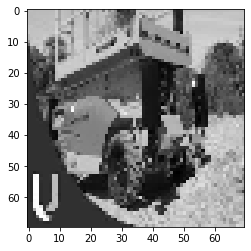

In [15]:
path = os.path.join(DATADIR, CATEGORIES[1], "mqdefault.jpg")  
predicted_img_array = cv2.imread(os.path.join(path) ,cv2.IMREAD_GRAYSCALE) 
predicted_img_array = cv2.resize(predicted_img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(predicted_img_array, cmap='gray') 
plt.show()

In [16]:
pred_X = np.array(predicted_img_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [17]:
result = model.predict(
    pred_X,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

In [18]:
print("The type of asset on image is", CATEGORIES[int(result[0][0])] + ".")

The type of asset on image is scissor lift.
